### JDF - boundary condition analysis and transports

## LEADING QUESTIONS:

    - when does most of the carbon transport happen?
    - does DIC transport follow salinity transport?
    - what is the interannual variability here?
    

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import warnings
warnings.filterwarnings('ignore') 

In [4]:
import netCDF4 as nc
import matplotlib
from matplotlib import pyplot as plt
from salishsea_tools import (
    viz_tools)
import cmocean as cm
import numpy as np
import seawater
import arrow
import xarray as xr
import pickle

plt.rcParams.update({'font.size': 14})

# import mpl_interactions.ipyplot as iplt
# from mpl_interactions import indexer
# %matplotlib ipympl

## Visualize where transports are output in the model

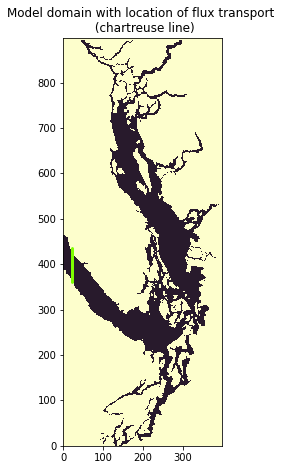

In [5]:
fact = 0.5
fig = plt.figure(figsize=(15*fact, 15*fact))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
viz_tools.set_aspect(ax1)   
fmask = (grid['fmask'][0,0,:,:])    
mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)
# for i in range(370,480):
#     pts = ax1.scatter(5,i,s=3,c='red', marker='o')
    
for i in range(361,(361+75)):
    pts = ax1.scatter(23,i,s=3,c='chartreuse', marker='o')
    
w = plt.title('Model domain with location of flux transport \n (chartreuse line)')

## [A] Summer and winter transport magnitudes in property space

#### top row is summer, bottom is winter

    -hard to see deviations from a constant DIC/salinity ratio here. 
    - dot is surface, number '253' is bottom (253 meters deep) 
    - flux magnitude typically goes from dot to bottom left (most negative for both quantities) to top right (most pos for both q), then back towards 0 with depth.
    - magnitude of transport does change interannually and is easily viewable here
    - this visualisation doesn't well show a) where things 'turn around' and changes due to contributions of the various layers to transport (due to size), but is good at showing extremes, and interannual magnitude changes

In [6]:
# depths[20]

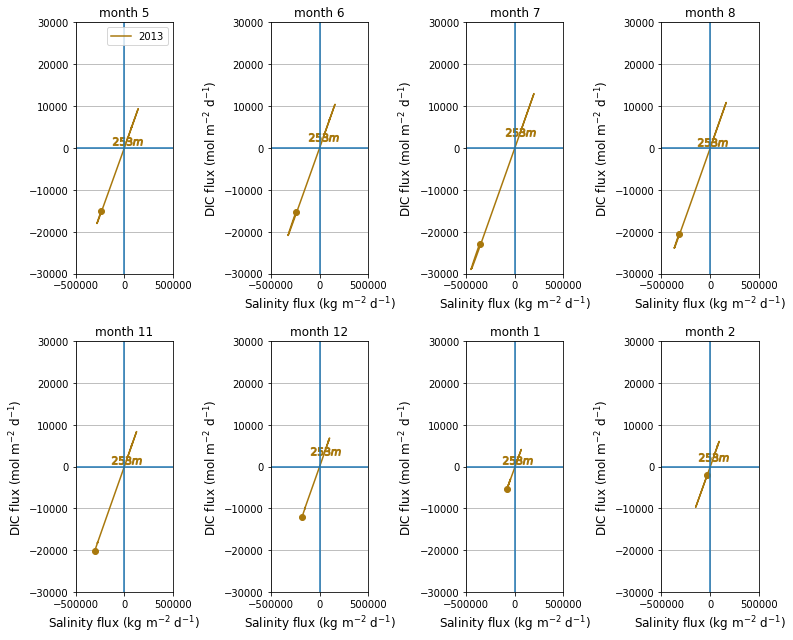

In [7]:
txmi = -5e5; txma = 5e5
tymi = -3e4; tyma = 3e4
tcmap = cm.cm.phase
sal_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/sal_flux_stor_conc.pkl', 'rb'))  
DIC_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/DIC_flux_stor_conc.pkl', 'rb'))  

months = [5,6,7,8,11,12,1,2]

## one year
fact = 0.3
fig, axs = plt.subplots(2,4, figsize=(11, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.21)
axs = axs.ravel()
for i in range(1):
    for y in range(0,1):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     DIC_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7), label = f'{y+2013}')
        axs[i].legend()
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     DIC_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,32,months[i]-1],\
                     DIC_flux_stor_conc[y,32,months[i]-1], marker = "$253m$", markersize = 30,\
                    color = tcmap(y/7))
    axs[i].grid()
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_xlim([txmi,txma])
    axs[i].set_ylim([tymi,tyma])

for i in range(1,8):
    for y in range(0,1):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     DIC_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     DIC_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
#         axs[i].plot(sal_flux_stor_conc[y,20,months[i]-1],\
#                      DIC_flux_stor_conc[y,20,months[i]-1], marker = 'x', color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,32,months[i]-1],\
                     DIC_flux_stor_conc[y,32,months[i]-1], marker = "$253m$", markersize = 30,\
                    color = tcmap(y/7))
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_ylim([tymi,tyma])
    axs[i].set_xlabel("Salinity flux (kg m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].set_ylabel("DIC flux (mol m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].grid()
plt.tight_layout()

### [A1] the same idea, for all 7 years

    - this is useful for comparing various changes in flux range interannually, but really doesn't tell us much because DIC/salt differences are small and not easily discernible in this visualisation

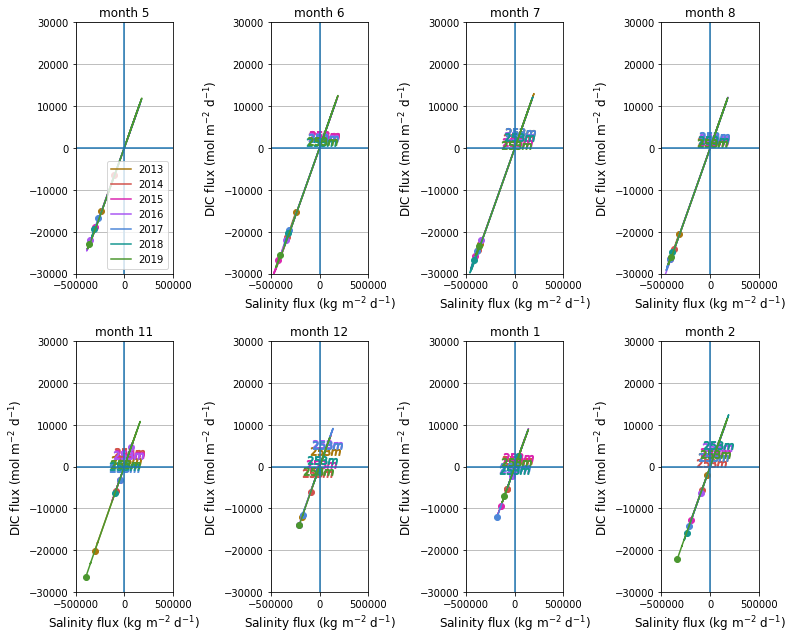

In [8]:
txmi = -5e5; txma = 5e5
tymi = -3e4; tyma = 3e4
tcmap = cm.cm.phase
sal_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/sal_flux_stor_conc.pkl', 'rb'))  
DIC_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/DIC_flux_stor_conc.pkl', 'rb'))  

months = [5,6,7,8,11,12,1,2]

## one year
fact = 0.3
fig, axs = plt.subplots(2,4, figsize=(11, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.21)
axs = axs.ravel()

for i in range(1):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     DIC_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7), label = f'{y+2013}')
        axs[i].legend()
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     DIC_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
    axs[i].grid()
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_ylim([tymi,tyma])

for i in range(1,8):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     DIC_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     DIC_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,32,months[i]-1],\
                     DIC_flux_stor_conc[y,32,months[i]-1], marker = "$253m$", markersize = 30,\
                    color = tcmap(y/7))
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_ylim([tymi,tyma])
    axs[i].set_xlabel("Salinity flux (kg m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].set_ylabel("DIC flux (mol m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].grid()
plt.tight_layout()

## [B] Monthly transport magnitudes as depth profiles

    - in winter, flux changes direction a bit below 50m, in summer, this is almost always around 50m
    - always a tendency for highest flux in between 100-150 meters, months 6-8
    - highest flux out also in these months (typically month 7-8)
  

(40,)
(40,)


Text(0.5, 1.05, 'DIC fluxes')

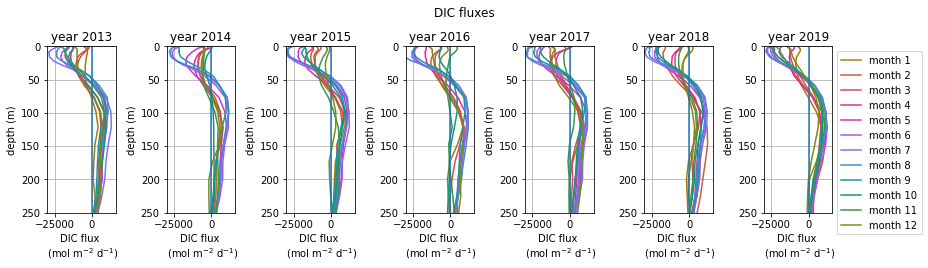

In [9]:
txmi = -3e4; txma = 1.6e4
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
print(np.shape(depths))
print(np.shape(DIC_flux_stor_conc[y,:,0]))
fig, axs = plt.subplots(1,7, figsize=(13, 3.5), facecolor='w', edgecolor='k')
axs = axs.ravel()
for y in range(0,7):
    for i in range(0,12):

        axs[y].plot(DIC_flux_stor_conc[y,:,i],depths, color = tcmap(i/12),label = f'month {i+1}')
    axs[y].set_ylim([0,250]); axs[y].invert_yaxis(); 
    axs[y].axvline(x=0); axs[y].grid();    
    axs[y].set_xlim([txmi,txma]); axs[y].set_title(f'year {y+2013}')
    axs[y].set_xlabel("DIC flux \n (mol m$^{-2}$ d$^{-1}$)")
    axs[y].set_ylabel('depth (m)')
axs[6].legend(bbox_to_anchor = [1,1])
plt.tight_layout()
plt.suptitle('DIC fluxes', y = 1.05)


#### can identify anomalous transport months by subtracting climatology

(40,)
(40,)


Text(0.5, 1.05, 'DIC fluxes minus mean monthly flux profile')

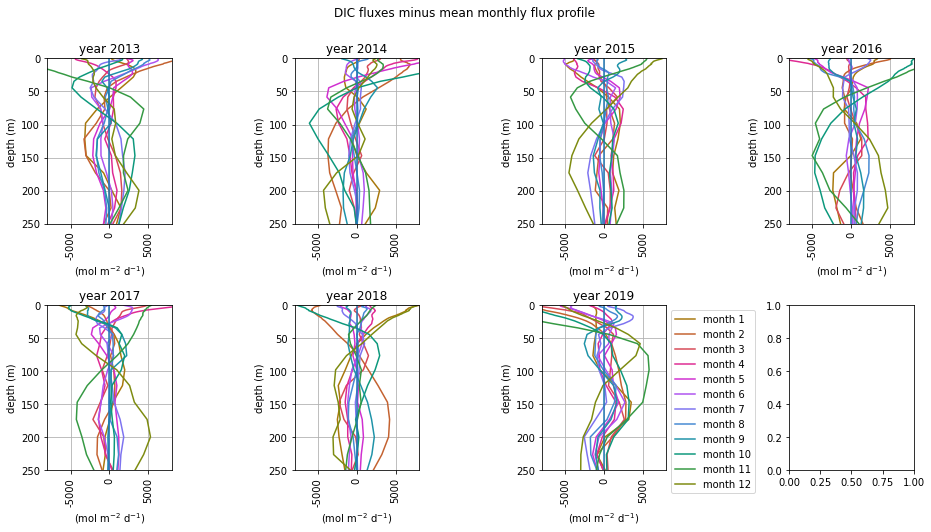

In [10]:
txmi = -8e3; txma = 8e3
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
print(np.shape(depths))
print(np.shape(DIC_flux_stor_conc[y,:,0]))
fig, axs = plt.subplots(2,4, figsize=(13, 3.5*2), facecolor='w', edgecolor='k')
axs = axs.ravel()
for y in range(0,7):
    for i in range(0,12):

        axs[y].plot(DIC_flux_stor_conc[y,:,i]-np.nanmean(DIC_flux_stor_conc[:,:,i],axis = 0),\
                    depths, color = tcmap(i/12),label = f'month {i+1}')
    axs[y].set_ylim([0,250]); axs[y].invert_yaxis(); 
    axs[y].axvline(x=0); axs[y].grid();    
    axs[y].set_xlim([txmi,txma]); axs[y].set_title(f'year {y+2013}')
    axs[y].set_xlabel("(mol m$^{-2}$ d$^{-1}$)")
    axs[y].set_ylabel('depth (m)')
    axs[y].set_xticks([-5000,0,5000])
    axs[y].set_xticklabels([-5000,0,5000],rotation = 90)
    
axs[6].legend(bbox_to_anchor = [1,1])


plt.tight_layout()
plt.suptitle('DIC fluxes minus mean monthly flux profile', y = 1.05)


## DIC fluxes by month, along with salinity fluxes, and DIC/salinity flux ratio

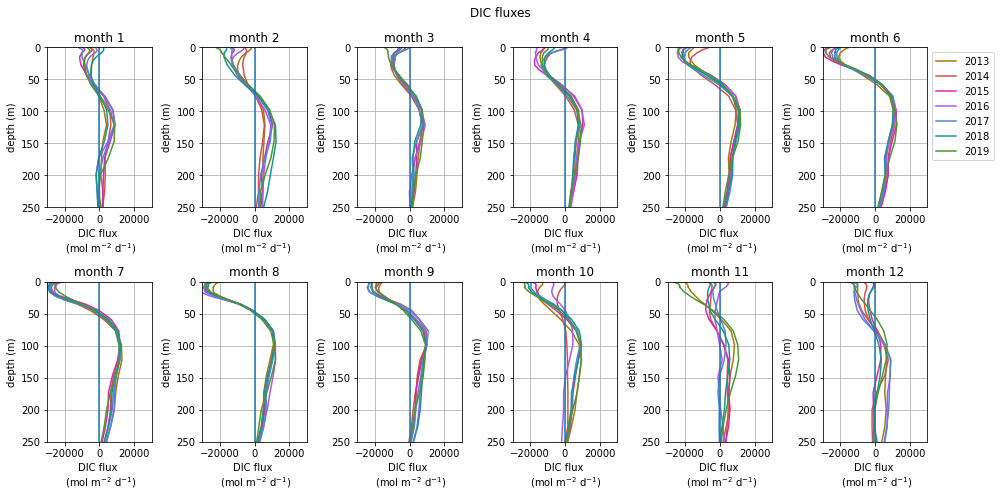

In [11]:
txmi = -3e4; txma = 3e4
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(DIC_flux_stor_conc[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("DIC flux \n (mol m$^{-2}$ d$^{-1}$)")
    axs[i].set_ylabel('depth (m)')
axs[5].legend(bbox_to_anchor = [1,1])

plt.suptitle('DIC fluxes')
plt.tight_layout()

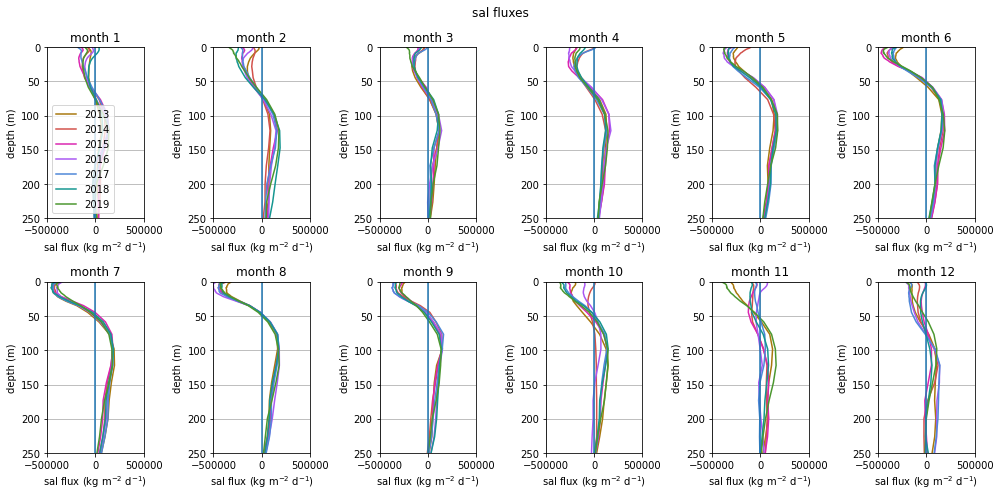

In [12]:
txmi = -5e5; txma =5e5
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("sal flux (kg m$^{-2}$ d$^{-1}$)")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('sal fluxes')
plt.tight_layout()

In [13]:
print('mean ratio of DIC flux to salinity flux mol/kg')
meanrat = np.nanmean(np.divide(DIC_flux_stor_conc[:,:,:],sal_flux_stor_conc[:,:,:]))
print(meanrat)


mean ratio of DIC flux to salinity flux mol/kg
0.06759937688016714


##### salinity fluxes and DIC fluxes are really well-linked by the mean ratio. blips around 'flux sign turnaround depths', which change seasonally (because dividing by small numbers..)

##### hoping to see biology in the change of the DIC/salt flux ratio from surface to depth, and I do, but there are 'chaotic' (not formally chaotic) signals in the winter ratio variability. 

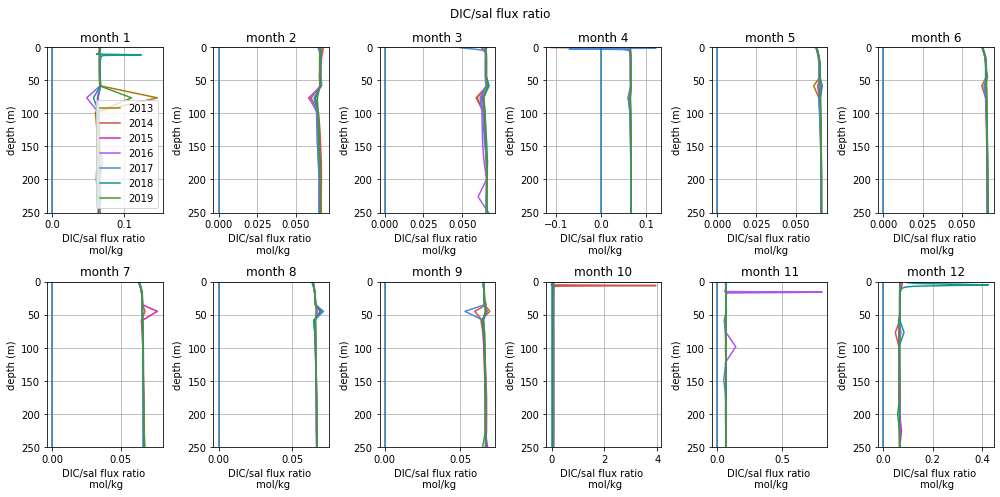

In [14]:
txmi = -5e5; txma =5e5
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(np.divide(DIC_flux_stor_conc[y,:,i],sal_flux_stor_conc[y,:,i]),depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    #axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("DIC/sal flux ratio \n mol/kg")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('DIC/sal flux ratio'); plt.tight_layout()


(40,)
(40,)


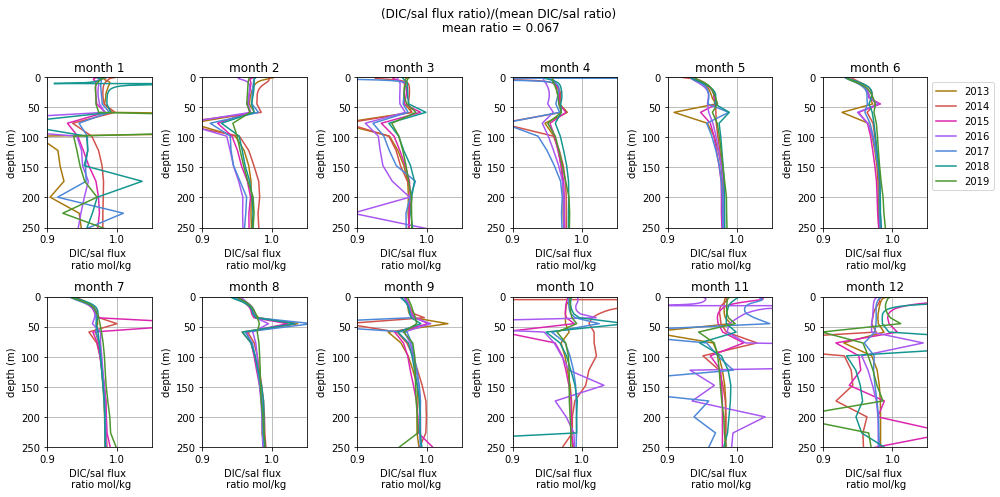

In [15]:
txmi = -5e5; txma =5e5
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
print(np.shape(depths))
print(np.shape(sal_flux_stor_conc[y,:,0]))
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        DICsal = np.divide(DIC_flux_stor_conc[y,:,i],sal_flux_stor_conc[y,:,i])
        axs[i].plot(DICsal/meanrat,depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([0.9,1.05]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("DIC/sal flux \n ratio mol/kg")
    axs[i].set_ylabel('depth (m)')
axs[5].legend(bbox_to_anchor = [1,1])

plt.suptitle('(DIC/sal flux ratio)/(mean DIC/sal ratio) \n mean ratio = 0.067 \n')
plt.tight_layout()


##### Summary: these plots show a characteristic pattern in the transport tendency by depth and season that's well-definable and not surprising. Largely, carbon follows salt. Cannot (yet) explain winter 'blips' (often very large) in DIC/salt ratio. Winters are the most interannually variable with regards to transports and ratios.

# Comparing salinity fluxes to physical fluxes

In [31]:
np.shape(size_ar_masked)

size_perrow = np.nansum(size_ar_masked,axis = 1)
print(np.shape(size_perrow))

size_broad = np.zeros([7,40,12])

for i in range(0,7):
    for k in range(0,12):
        size_broad[i,:,k] = size_perrow

(40,)


In [33]:
phys_flux_stor = \
pickle.load(open('./pkls_pyscripts/phys_flux_stor.pkl', 'rb'))  


phys_flux_stor_conc =\
np.divide(phys_flux_stor,size_broad)

 
pickle.dump(phys_flux_stor_conc, \
            open("./pkls_pyscripts/phys_flux_stor_conc.pkl", 'wb'))
    

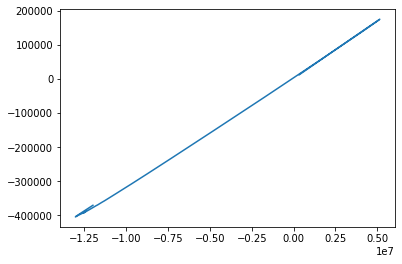

In [37]:
plt.plot(phys_flux_stor_conc[6,:,6],\
        sal_flux_stor_conc[6,:,6])

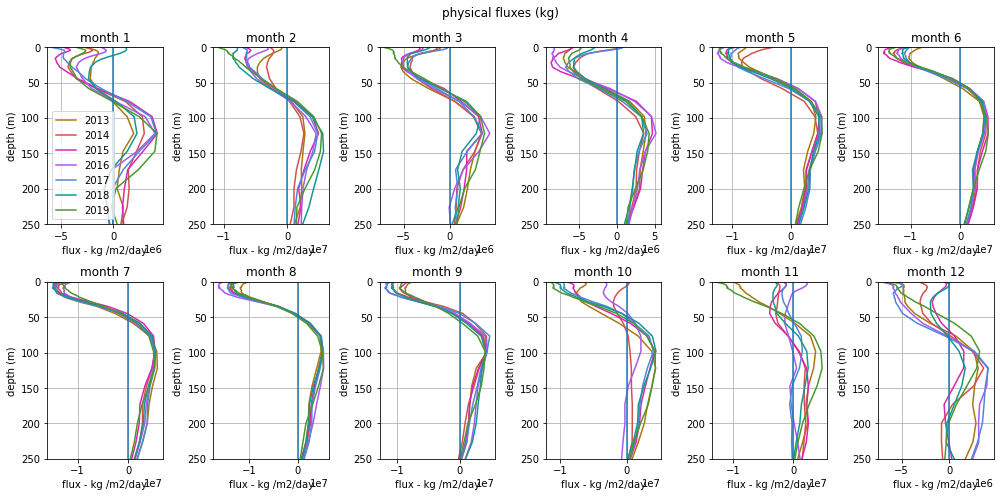

In [40]:
txmi = -5e5; txma =5e5
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(phys_flux_stor_conc[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    #axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("flux - kg /m2/day")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('physical fluxes (kg)'); plt.tight_layout()


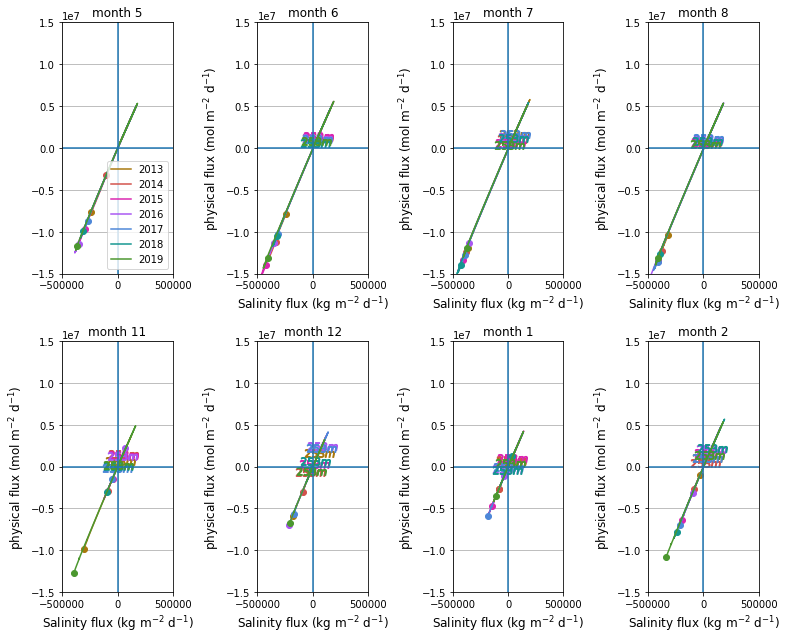

In [45]:
txmi = -5e5; txma = 5e5
tymi = -1.5e7; tyma = 1.5e7
tcmap = cm.cm.phase

months = [5,6,7,8,11,12,1,2]

## one year
fact = 0.3
fig, axs = plt.subplots(2,4, figsize=(11, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.21)
axs = axs.ravel()

for i in range(1):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     phys_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7), label = f'{y+2013}')
        axs[i].legend()
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     phys_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
    axs[i].grid()
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_ylim([tymi,tyma])

for i in range(1,8):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     phys_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     phys_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,32,months[i]-1],\
                     phys_flux_stor_conc[y,32,months[i]-1], marker = "$253m$", markersize = 30,\
                    color = tcmap(y/7))
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_ylim([tymi,tyma])
    axs[i].set_xlabel("Salinity flux (kg m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].set_ylabel("physical flux (mol m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].grid()
plt.tight_layout()